# RDKit을 활용한 분자 구조 분석

In [58]:
import pandas as pd
import numpy as np
import os
from rdkit import Chem
from rdkit.Chem import Draw

    
root = '/home/jhyang/WORKSPACES/DATA/polymers/f-polymer/'
df = pd.read_csv(os.path.join(root, 'f-polymer-20220603.csv'), index_col=0)
df = pd.read_csv(os.path.join(root, 'f-polymer-20220922.csv'), index_col=0)
df = pd.read_csv(os.path.join(root, 'dsc.csv'), index_col=0)

In [70]:
pairings = {k:set(v) for k,v in pairings.items() if 'Did' not in k}
pairings

{'CC(=C)C(=O)OCC(F)(F)C(F)(F)F': {'CC(=C)C(=O)OCC(C(F)(F)F)(F)F'},
 'CNC(=O)C(C)=C': {'CC(=C)C(=O)NC'},
 'OC(=O)C=C': {'C=CC(=O)O'},
 '[O-]C(=O)C(=C)C(F)(F)F': {'C=C(C(=O)O)C(F)(F)F'}}

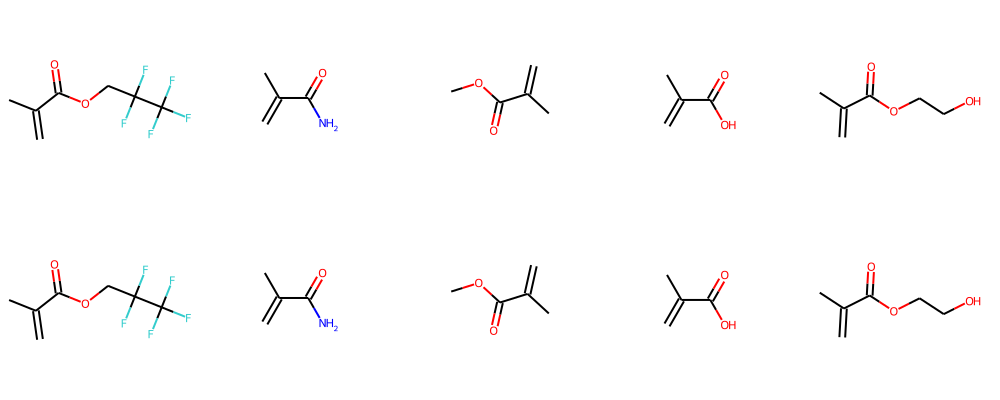

In [62]:
ms = []
for s in data['FA-00169'].smiles:
    ms.append(Chem.MolFromSmiles(s))
Draw.MolsToGridImage(ms, molsPerRow=5)
for s in data['FA-00170'].smiles:
    ms.append(Chem.MolFromSmiles(s))
Draw.MolsToGridImage(ms, molsPerRow=5)

In [ ]:
ims = []
for s1, s2 in pairings.items():
    m1 = Chem.MolFromSmiles(s1)
    m2 = Chem.MolFromSmiles(list(s2)[0])
    im = Draw.MolsToGridImage([m1, m2])
    ims.append(im)

In [3]:
from rdkit import Chem
from rdkit.Chem import Draw

smiles_all = sorted(set(df2[[f'SMILES_{x}' for x in 'ABCDE']].values.reshape(-1).tolist()))
ms = [Chem.MolFromSmiles(s) for s in smiles_all]

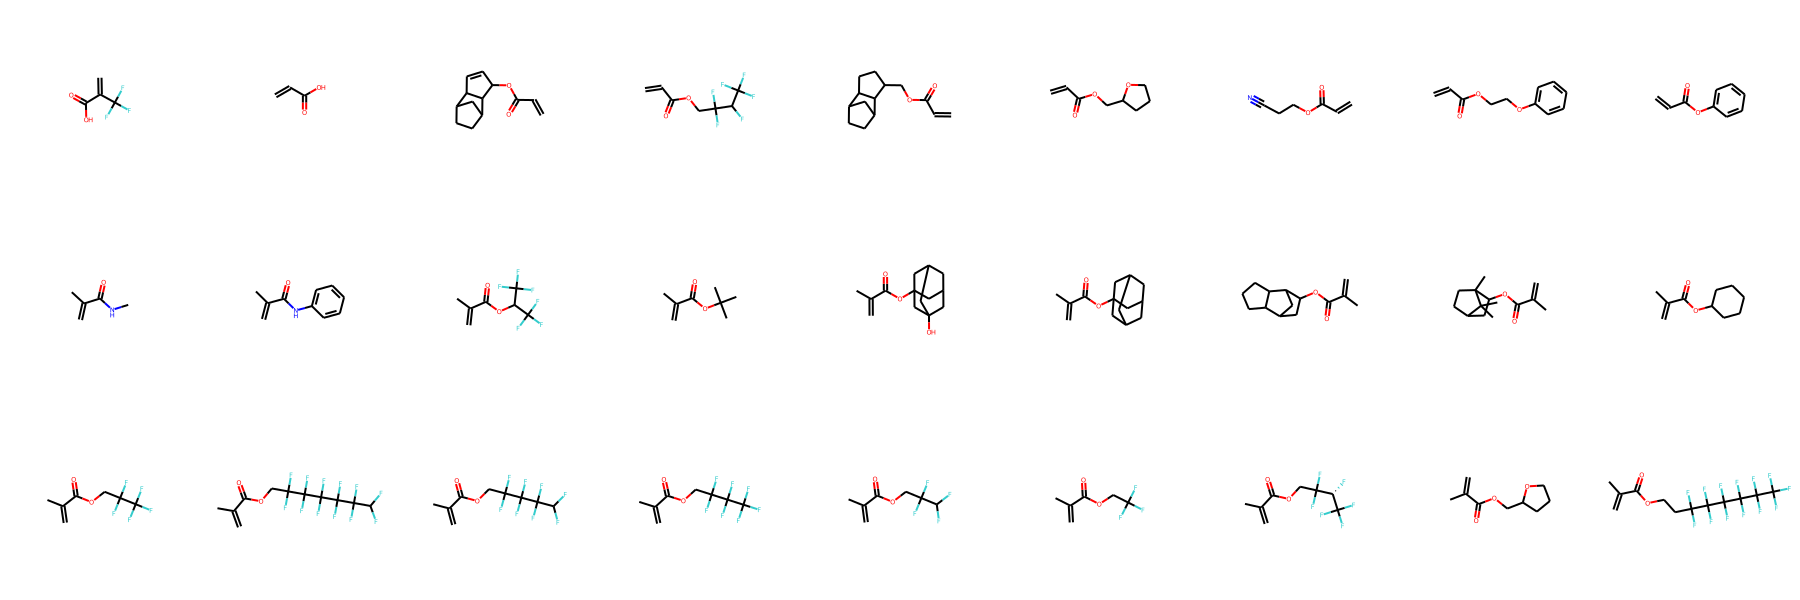

In [18]:
Draw.MolsToGridImage(ms[:27], molsPerRow=9)

## monomer mapping

In [215]:
smiles = {x:eval(f'df2.SMILES_{x}[df2.FR_{x} != 0].drop_duplicates().values') for x in 'ABCDE'}

In [229]:
mapper = {}
for k, ks in smiles.items():
    i = 1
    for s in ks:
        if s not in mapper.keys():
            mapper[s] = f'{k}-{i:02d}'
            i += 1
len(mapper), mapper

(57,
 {'C=CC(=O)OCC(C(C(F)(F)F)F)(F)F': 'A-01',
  'CC(=C)C(=O)OC(C(F)(F)F)C(F)(F)F': 'A-02',
  'CC(=C)C(=O)OCC(C(F)(F)F)(F)F': 'A-03',
  'CC(=C)C(=O)OCC(F)(F)[C@H](F)C(F)(F)F': 'A-04',
  'CC(=C)C(=O)OCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)F': 'A-05',
  'CC(=C)C(=O)OCC(F)(F)C(F)(F)C(F)(F)C(F)F': 'A-06',
  'CC(=C)C(=O)OCC(F)(F)C(F)(F)C(F)(F)F': 'A-07',
  'CC(=C)C(=O)OCC(F)(F)C(F)F': 'A-08',
  'CC(=C)C(=O)OCC(F)(F)F': 'A-09',
  'CC(=C)C(=O)OCc1c(c(c(c(c1F)F)F)F)F': 'A-10',
  'CC(=C)C(=O)OCCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F': 'A-11',
  'CC(=C)C(=O)OCCC(F)(F)C(F)(F)C(F)(F)C(F)(F)F': 'A-12',
  'COC(=O)C(C)=C': 'A-13',
  'FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)CCOC(=O)C=C': 'A-14',
  'FC(F)(F)C(F)(F)C(F)(F)C(F)(F)CCOC(=O)C=C': 'A-15',
  'FC(F)(F)C(F)(F)C(F)(F)COC(=O)C=C': 'A-16',
  'FC(F)(F)C(F)(F)COC(=O)C=C': 'A-17',
  'FC(F)(F)C(OC(=O)C=C)C(F)(F)F': 'A-18',
  'FC(F)(F)COC(=O)C=C': 'A-19',
  'CCCCCCCCCCCCCCCCCCOC(=O)C(C)=C': 'B-01',
  'CC(=C)C(=O)OC12CC3CC(C1)CC(C3)C2': 'B-02'

In [230]:
for k1, v1 in smiles.items():
    for k2, v2 in smiles.items():
        if 'ABCDE'.index(k1) >= 'ABCDE'.index(k2): continue
        for s1 in v1:
            for s2 in v2:
                if s1 != s2: continue
                print('{} / {} : {}'.format(k1, k2, s1))

A / B : CC(=C)C(=O)OC(C(F)(F)F)C(F)(F)F
A / B : CC(=C)C(=O)OCC(F)(F)[C@H](F)C(F)(F)F
A / B : CC(=C)C(=O)OCC(F)(F)C(F)(F)C(F)(F)C(F)F
A / B : CC(=C)C(=O)OCC(F)(F)C(F)F
A / B : CC(=C)C(=O)OCC(F)(F)F
A / B : CC(=C)C(=O)OCc1c(c(c(c(c1F)F)F)F)F
A / B : CC(=C)C(=O)OCCC(F)(F)C(F)(F)C(F)(F)C(F)(F)F
A / B : FC(F)(F)C(F)(F)C(F)(F)C(F)(F)CCOC(=O)C=C
A / B : FC(F)(F)C(F)(F)C(F)(F)COC(=O)C=C
A / B : FC(F)(F)COC(=O)C=C
A / C : COC(=O)C(C)=C
B / C : CCCCCCCCCCCCCCCCCCOC(=O)C(C)=C
B / C : CCCCOC(=O)C(C)=C
B / C : CCOC(=O)C(C)=C
B / C : COC(=O)C=C
B / E : CC(=C)C(=O)OC12CC3CC(C1)CC(C3)(C2)O


In [ ]:

for i, row in part.iterrows():
    w_sum = np.sum([eval(f'row.FR_{x}') for x in 'ABCDE'])
    eqn = ''
    for x in 'ABCDE':
        sim = mapper[eval(f'row.SMILES_{x}')]
        val = eval(f'row.FR_{x}')/w_sum
        eqn += ' {:5.3f} * {} +'.format(val, sim)
    eqn = eqn[:-1] + ' = {:6.4f}'.format(row.Target)
    print(eqn)
        
        
    

# Dataset loading test

In [142]:
MDQ = MoleculeDataset()
MDQ.generate_qm9(path='../dataset/qm9.csv')

  Overwriting attribute : norm
  Overwriting attribute : data
  Overwriting attribute : atom_feat_name
  Overwriting attribute : bond_feat_name
  Overwriting attribute : mol_feat_name
  Overwriting attribute : tag
  Overwriting attribute : targets
  Overwriting attribute : cache_fn


In [143]:
data = to_tensor(MDQ.data, device='cpu')

In [1]:
import sys
sys.path.append('..')
from utils.dataset import MoleculeDataset, collate_fn, fpolyv2_collate_fn, to_tensor
from utils.data import train_test_split
import numpy as np
from torch_geometric.nn import global_add_pool
import torch

MD = MoleculeDataset()
MD.generate_fpolyv2(path='../dataset/fpolymers_221123.csv')
MDQ = MoleculeDataset()
MDQ.generate_qm9(path='../dataset/qm9.csv')

  Overwriting attribute : norm
  Overwriting attribute : data
  Overwriting attribute : atom_feat_name
  Overwriting attribute : bond_feat_name
  Overwriting attribute : mol_feat_name
  Overwriting attribute : targets
  Overwriting attribute : tag
  Overwriting attribute : cache_fn


In [190]:
m = ['F' in d['smiles'] for d in MD._unique_data]
np.sum(m), len(m), len(MD._unique_data)

(20, 59, 59)

In [24]:
feat_f, _, _ = collate_fn(MD._unique_data, device='cpu')
feat_q, _, _ = collate_fn(MDQ._data, device='cpu')
faf, fbf, fmf = feat_f['atom_feat'], feat_f['bond_feat'], feat_f['mol_feat']
qaf, qbf, qmf = feat_q['atom_feat'], feat_q['bond_feat'], feat_q['mol_feat']

In [34]:
blacklist = []
masks = []
for n, ff, fq in zip(['atom','bond','mol'], [faf, fbf, fmf], [qaf, qbf, qmf]):
    fv = ff.std(dim=0).cpu().numpy()
    qv = fq.std(dim=0).cpu().numpy()
    fm = fv < 1e-2
    masks.append(fm)
    qm = qv < 1e-2
    print('{:5s} / {:3d} / {:3d} / {:3d}'.format(n, np.sum(fm), np.sum(qm), np.sum(fm | qm)))
    for i in np.where(fm | qm)[0]:
        s = ''
        if fm[i]:
            s += '*'
            blacklist.append(eval(f'MD.{n}_feat_name[i]'))
        s += '{:.3f}\t'.format(fv[i])
        if qm[i]:
            s += '*'
        s += '{:.3f}\t'.format(qv[i])
        print(s, eval(f'MD.{n}_feat_name[i]'))

atom  /   6 /   7 /   7
*0.000	*0.000	 block
0.014	*0.002	 fusion_heat
*0.000	*0.000	 metallic_radius
*0.000	*0.000	 period
*0.000	*0.000	 ele_config_s
*0.000	*0.000	 ele_config_d
*0.000	*0.000	 ele_config_f
bond  /   0 /   0 /   0
mol   / 122 / 103 / 133
*0.000	*0.000	 NumRadicalElectrons
*0.008	*0.002	 PEOE_VSA1
*0.008	*0.002	 PEOE_VSA10
*0.008	*0.002	 PEOE_VSA11
*0.008	*0.002	 PEOE_VSA12
*0.008	*0.002	 PEOE_VSA13
*0.008	*0.002	 PEOE_VSA14
*0.008	*0.002	 PEOE_VSA2
*0.008	*0.002	 PEOE_VSA3
*0.008	*0.002	 PEOE_VSA4
*0.008	*0.002	 PEOE_VSA5
*0.008	*0.002	 PEOE_VSA6
*0.008	*0.002	 PEOE_VSA7
*0.008	*0.002	 PEOE_VSA8
*0.008	*0.002	 PEOE_VSA9
*0.008	*0.002	 SMR_VSA1
*0.008	*0.002	 SMR_VSA10
*0.008	*0.002	 SMR_VSA2
*0.008	*0.002	 SMR_VSA3
*0.008	*0.002	 SMR_VSA4
*0.008	*0.002	 SMR_VSA5
*0.008	*0.002	 SMR_VSA6
*0.008	*0.002	 SMR_VSA7
*0.008	*0.002	 SMR_VSA8
*0.008	*0.002	 SMR_VSA9
*0.008	*0.002	 SlogP_VSA1
*0.008	*0.002	 SlogP_VSA10
*0.008	*0.002	 SlogP_VSA11
*0.008	*0.002	 SlogP_VSA12
*0.008

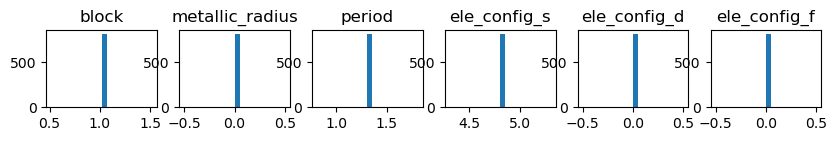

In [38]:
import matplotlib.pyplot as plt
f, axs = plt.subplots(1, np.sum(masks[0]), figsize=(10,1))
for i, ax in zip(np.where(masks[0])[0], axs):
    ax.set_title(MD.atom_feat_name[i])
    ax.hist(faf[:, i], bins=20)
    

In [48]:
names = []
for n in MD.mol_feat_name:
    if 'VSA' in n: names.append(n)

In [33]:
import json
with open('../dataset/blacklist.json','w') as f:
    json.dump(blacklist, f, indent=4)

In [58]:
from model.models import DualHeadModel, SingleModel

model = SingleModel('cat', encoder_params={
#model = DualHeadModel('cat', encoder_params={
    'graph_net_params':{'node_dim':26, 'edge_dim':5, 'output_dim':32},
    'mol_net_params':{'input_dim':399, 'output_dim':32},
    }, decoder_params={'output_dim':1, 'hidden_dim':32, 'n_layer':2}, shared=False)

In [149]:
_, tgt_qm9, _ = collate_fn(MDQ.data)

In [150]:
N = tgt_qm9.shape[0]
cutoff = 0.02

idxs = np.arange(N)
outs = [[] for _ in range(12)]
for _ in range(100):
#np.random.seed(123)
    np.random.shuffle(idxs)
    target = tgt_qm9[idxs][:int(N*0.95)]
    avgs = target.mean(dim=0)
    for j, (avg_, dat_) in enumerate(zip(avgs, target.T)):
        i = (dat_ - avg_).abs().argsort()[-int(N*cutoff) - 1]
        div = (dat_[i] - avg_).abs().unsqueeze(0)
        avg = dat_[(dat_ <= avg_ + div) & (dat_ >= avg_ - div)].mean().unsqueeze(0)
        outs[j].append([avg.item(), div.item()])

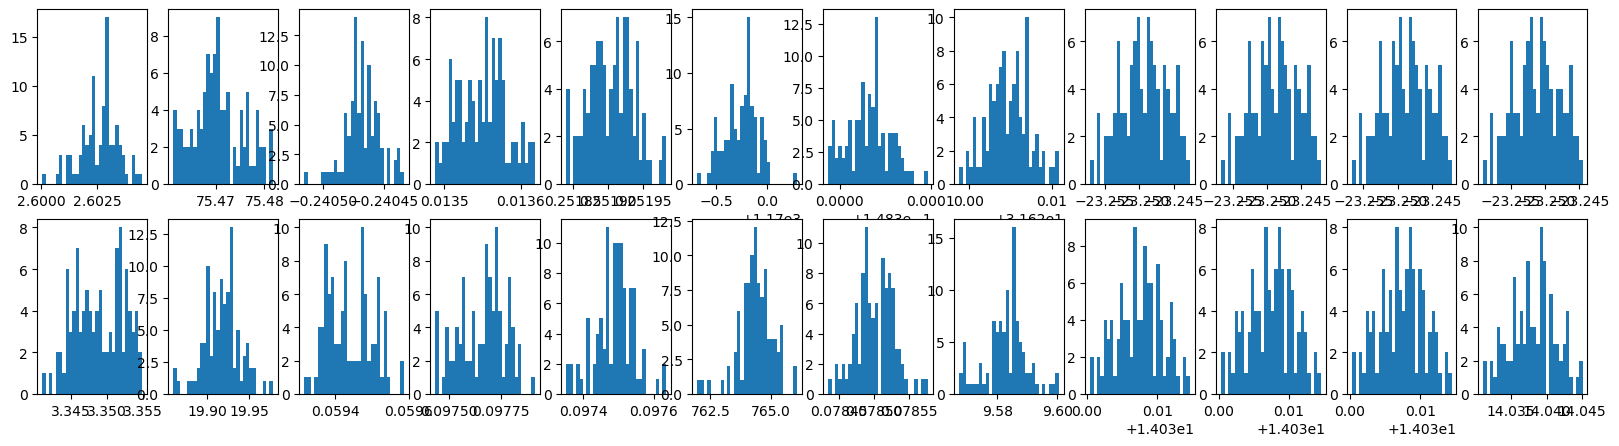

In [151]:
outs = np.array(outs).transpose(0,2,1)
f, axs = plt.subplots(2, 12, figsize=(20,5))
for iout, iaxs in zip(outs, axs.T):
    for out, ax in zip(iout, iaxs):
        ax.hist(out, bins=30)

In [11]:
import pandas as pd
import numpy as np
df = pd.read_csv('../../data/qm9.csv')

idx = np.arange(df.shape[0])
np.random.shuffle(idx)
df.iloc[sorted(idx[:500])].to_csv('../../data/qm9.test.csv', index=False)

In [155]:
root = '/home/jhyang/WORKSPACES/MODELS/fpoly/r100/encoders_2/concat/cg'
with open(f'{root}/00500.valid.pkl','rb') as f:
    import pickle
    pdata = pickle.load(f)
valid_data = data[[int(i.split('-')[1])-1 for i in pdata[0]]]

model = model.load(f'{root}/00500.model.torch', rebuild_model=True)
feat, target, ids = collate_fn(valid_data)
model.eval()
with torch.no_grad():
    p = model(**feat)

In [169]:
from sklearn.metrics import r2_score
r2s = []
for scale in scales:
    avg, div = torch.from_numpy(scale).unsqueeze(1)
    r2s.append([r2_score(p1, p2) for p1, p2 in zip((p * div + avg).cpu().numpy().T, pdata[2].T)])

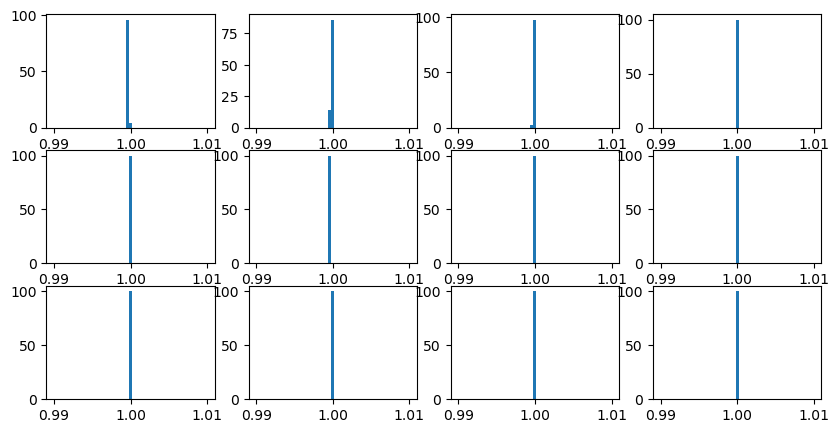

In [183]:
f, axs = plt.subplots(3, 4, figsize=(10, 5))
for v, ax in zip(np.array(r2s).T, axs.reshape(-1)):
    ax.hist(v, bins=np.linspace(0.99,1.01,50))

In [187]:

idxs = np.arange(N)
outs = [[] for _ in range(12)]
np.random.seed(123)
np.random.shuffle(idxs)
target = tgt_qm9[idxs][:int(N*0.95)]
avgs = target.mean(dim=0)
__div = []
__avg = []
for j, (avg_, dat_) in enumerate(zip(avgs, target.T)):
    i = (dat_ - avg_).abs().argsort()[-int(N*cutoff) - 1]
    div = (dat_[i] - avg_).abs().unsqueeze(0)
    avg = dat_[(dat_ <= avg_ + div) & (dat_ >= avg_ - div)].mean().unsqueeze(0)
    __div.append(div)
    __avg.append(avg)
div = torch.concat(__div).cpu().numpy()
avg = torch.concat(__avg).cpu().numpy()
p.cpu().numpy() * div + avg - pdata[2]

array([[ 4.4839382e-03,  3.7216187e-02, -1.5890598e-04, ...,
         1.4945984e-02,  1.4947891e-02,  1.4835358e-02],
       [-7.2529316e-03,  6.1035156e-04, -3.3494830e-04, ...,
         1.2584686e-02,  1.2586594e-02,  1.2460709e-02],
       [ 1.0777712e-02, -8.4396362e-02, -2.8853118e-04, ...,
         9.7045898e-03,  9.7064972e-03,  9.5539093e-03],
       ...,
       [-1.3015509e-02, -4.2709351e-02,  3.5911798e-05, ...,
         1.3122559e-02,  1.3126373e-02,  1.2884140e-02],
       [-2.4904251e-02,  2.0194244e-01,  2.7710199e-04, ...,
         2.0696640e-02,  2.0709991e-02,  2.0469666e-02],
       [-8.5713863e-03, -3.4408569e-02, -1.7105043e-04, ...,
         1.3223648e-02,  1.3223648e-02,  1.3217926e-02]], dtype=float32)

In [13]:
feat, tgt, ids = fpolyv2_collate_fn(MD.data[:100], device='cuda')
print(feat['batch_f'].max(), feat['batch_c'].max())

tensor(99, device='cuda:0') tensor(95, device='cuda:0')


In [14]:
mf = feat['feat_f']['mol_feat']
wf = feat['feat_f']['weight']
bf = feat['batch_f']
mc = feat['feat_c']['mol_feat']
wc = feat['feat_c']['weight']
bc = feat['batch_c']

In [29]:
h1 = global_add_pool(mf * wf, bf)
h2 = global_add_pool(mc, bc)
h1.shape, h2.shape
n1 = h1.shape[0]
n2 = h2.shape[0]
n = np.max([n1, n2])

In [31]:
torch.vstack([h1, torch.zeros_like(h1)[:n-n1]]).shape, torch.vstack([h2, torch.zeros_like(h2)[:n-n2]]).shape

(torch.Size([100, 399]), torch.Size([100, 399]))

In [8]:
smiles_f = []
smiles_c = []
for data in MD.data:
    for d in data['F']:
        s = d['smiles']
        if s not in smiles_f:
            smiles_f.append(s)
    for d in data['nF']:
        s = d['smiles']
        if s not in smiles_c:
            smiles_c.append(s)

In [12]:
len(smiles_f), len(smiles_c)

(20, 39)

In [28]:
def test_fn(dataset):
    data_F = []
    data_C = []
    batch_F = []
    batch_C = []
    targets = []
    ids = []
    for i, data in enumerate(dataset):
        F = data['F']
        C = data['nF']
        id, target = data['info']
        data_F.extend(F)
        data_C.extend(C)
        batch_F.extend([i]*len(F))
        batch_C.extend([i]*len(C))
        targets.append(target)
        ids.append(id)
    feat_F, _, _ = collate_fn(data_F)
    feat_C, _, _ = collate_fn(data_C)
    return feat_F, feat_C, batch_F, batch_C, ids, targets

ff, fc, bf, bc, ids, tgts = test_fn(dpart)
tpart = np.hstack([d['nF'] for d in dpart])

In [16]:
mff = global_add_pool(ff['mol_feat'], torch.tensor(bf).long())
mfc = global_add_pool(fc['mol_feat'], torch.tensor(bc).long())
mff.shape, mfc.shape

(torch.Size([7, 399]), torch.Size([7, 399]))

In [29]:
mfcc = mfc.to('cuda')
%timeit collate_fn(tpart)

68.7 µs ± 231 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [13]:
ff

NameError: name 'ff' is not defined

# Model loading test

In [1]:
%load_ext autoreload
%autoreload 2
from utils.dataset import MoleculeDataset, data_augmentation, to_tensor, to_numpy, collate_fn, fpoly_collate_fn

import numpy as np
import torch
import pandas as pd

/home/jhyang/anaconda3/envs/fpoly/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = MoleculeDataset()
dataset.generate_fpoly('./dataset/fpolymers.csv')

  Overwriting attribute : norm
  Overwriting attribute : data
  Overwriting attribute : atom_feat_name
  Overwriting attribute : bond_feat_name
  Overwriting attribute : mol_feat_name
  Overwriting attribute : targets
  Overwriting attribute : tag
  Overwriting attribute : cache_fn


In [13]:
from utils.data import train_test_split
d_train_, d_test = train_test_split(dataset, train_ratio=0.8)
d_train, d_valid = train_test_split(d_train_, train_ratio=0.9)
len(d_train), len(d_valid), len(d_test)

(184, 21, 52)

In [29]:
184 / 32

5.75

In [14]:
qm9_feats, _, _ = collate_fn(dataset.data.reshape(-1)[:2], device='cuda')
poly_feats, tgts, ids = fpoly_collate_fn(dataset.data[:2], device='cuda')

In [5]:
encoder_params={
    'graph_net_params':{
         'node_dim':26,
         'edge_dim':5,
         'output_dim':64,
         'hidden_dim':128,
         'n_layer':3               
    },
    'mol_net_params':{
         'input_dim':399,
         'output_dim':64,
         'hidden_dim':256,
         'n_layer':2
    },
}
decoder_params={
    'output_dim':1,
    'hidden_dim':256,
    'n_layer':1
}

In [22]:
from model.models import MultiHeadModel, SingleModel, LinearDecoder
from torch.utils.tensorboard import SummaryWriter
import os

root = './test/concat_mul_share'
os.makedirs(root, exist_ok=True)
writer = SummaryWriter(root)

model = MultiHeadModel(encoder_type='concat',
               encoder_params=encoder_params, decoder_params=decoder_params, shared=True).cuda()

#model = SingleModel(encoder_type='graph', 
#                    encoder_params=encoder_params, decoder_params=decoder_params).cuda()

model.eval()
with torch.no_grad():
#    writer.add_graph(model, ((v for v in feats[f'mol_{x}'].values()) for x in 'ABCDE'))
    writer.add_graph(model, [v for v in poly_feats.values()])
#    writer.add_graph(model, [v for v in qm9_feats.values()])

In [238]:
model = LinearDecoder({'input_dim':5,'output_dim':1,'hidden_dim':20,'n_layer':3})

root = './test/test'
os.makedirs(root, exist_ok=True)
writer = SummaryWriter(root)

model.eval()
with torch.no_grad():
    writer.add_graph(model, torch.rand(20).view(-1,5))
#model

In [164]:
[[v for v in feats[f'mol_{x}'].values()] for x in 'ABCDE']

[[tensor([[12.0110,  1.0000,  3.0000,  ...,  0.0000,  0.0000,  3.3164],
          [12.0110,  3.0000,  0.0000,  ...,  0.0000,  0.0000,  3.3164],
          [12.0110,  1.0000,  2.0000,  ...,  0.0000,  0.0000,  3.3164],
          ...,
          [15.9990,  1.0000,  0.0000,  ...,  0.0000,  0.0000,  4.0108],
          [12.0110,  2.0000,  1.0000,  ...,  0.0000,  0.0000,  3.3164],
          [12.0110,  1.0000,  2.0000,  ...,  0.0000,  0.0000,  3.3164]],
         device='cuda:0'),
  tensor([[1., 1., 0., 0., 0.],
          [1., 1., 0., 0., 0.],
          [2., 2., 0., 1., 0.],
          ...,
          [1., 1., 0., 1., 1.],
          [2., 2., 0., 1., 0.],
          [2., 2., 0., 1., 0.]], device='cuda:0'),
  tensor([[   0,    1,    1,  ..., 4027, 4027, 4028],
          [   1,    0,    2,  ..., 4025, 4028, 4027]], device='cuda:0'),
  tensor([[11.3725, -4.4672, 11.3725,  ...,  2.3930,  0.0000,  0.0000],
          [11.3725, -4.4672, 11.3725,  ...,  2.3930,  0.0000,  0.0000],
          [13.1195, -2.2639,

In [144]:
before_train = {k:v.cpu().numpy() for k,v in model.state_dict().items()}
crit = torch.nn.MSELoss()
opt = torch.optim.AdamW(model.parameters(), lr=1e-2)

model.train()
losses = []
for i in range(500):
    
    out = model(**feats)
    loss = crit(out, tgts)
    
    opt.zero_grad()
    loss.backward()
    opt.step()
    losses.append(loss.cpu().item())

after_train = {k:v.cpu().numpy() for k,v in model.state_dict().items()} 

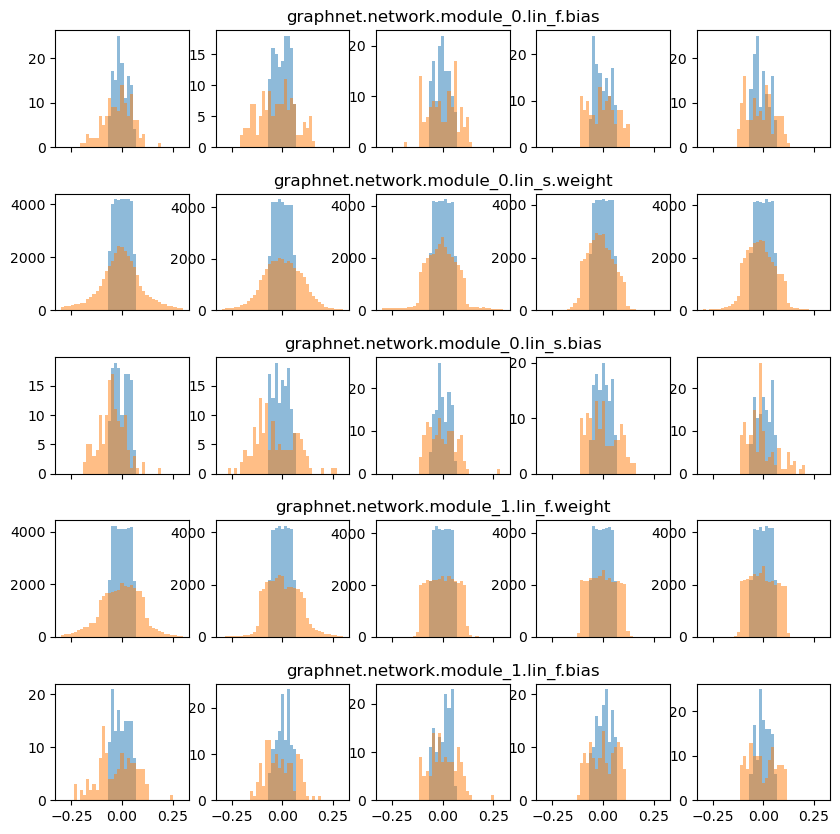

In [150]:
import matplotlib.pyplot as plt
%matplotlib inline

keys = [k.replace('encoder_A.','') for k in before_train.keys() if 'encoder_A' in k]

i_base = 3
f, axs = plt.subplots(5, 5, figsize=(10, 10), sharex=True)
for i, ax in enumerate(axs):
    key = keys[i_base + i]
    ax[2].set_title(key)
    for j, x in enumerate('ABCDE'):
        ax[j].hist(before_train[f'encoder_{x}.{key}'].reshape(-1), alpha=0.5, bins=np.linspace(-0.3,0.3,40))
        ax[j].hist(after_train[f'encoder_{x}.{key}'].reshape(-1), alpha=0.5, bins=np.linspace(-0.3,0.3,40))
plt.subplots_adjust(hspace=0.4)

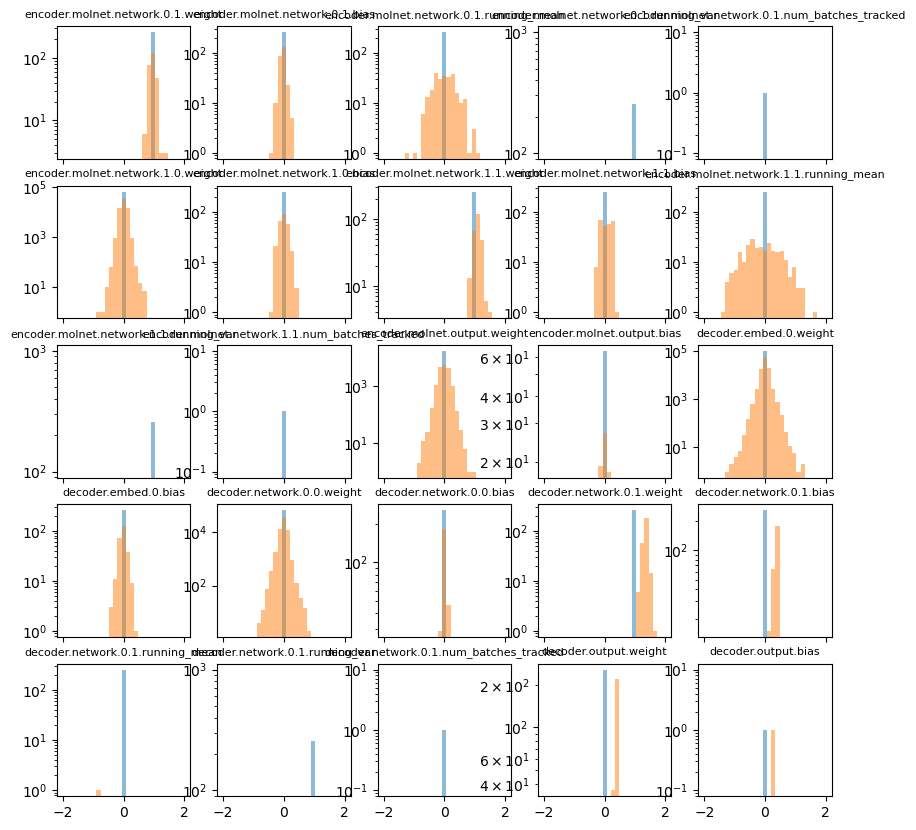

In [142]:
keys = list(before_train.keys())

f, axs = plt.subplots(5, 5, figsize=(10, 10), sharex=True)
i_base = 25
for i, ax in enumerate(axs.reshape(-1)):
    key = keys[i_base + i]
    ax.set_title(key, fontsize=8)
    ax.hist(before_train[key].reshape(-1), alpha=0.5, bins=np.linspace(-2,2,30))
    ax.hist(after_train[key].reshape(-1), alpha=0.5, bins=np.linspace(-2,2,30))
    ax.set_yscale('log')


# Model loading test - SSIB 문제

In [3]:
from utils.dataset import MoleculeDataset, collate_fn, to_tensor
from utils.data import train_test_split, CrossValidation
from utils.trainer import SSIBTrainer
from utils.runner import run_ssib
from utils.params import Parameters
from model.models import SSIBEncoder
import torch, gc, os
from torch.utils.data import DataLoader
import numpy as np

p = Parameters(fn='concat_mult_add_cg.json', root='./ft_params')
#
dataset = MoleculeDataset(norm=True)
dataset.generate_fpoly(path=p.data_path, col_target=p.target_column)
#
#data = to_tensor(dataset.data, device=p.device)
#train_data_, test_data = train_test_split(data, train_ratio=p.train_ratio, seed=123)
#
#np.random.seed(42)
#torch.manual_seed(42)
#torch.cuda.manual_seed(42)
#
#k_fold = CrossValidation(train_data_, 5)
#p.num_repeat = 5
#
p.graph_net_params.update({
    'node_dim':dataset.num_atom_feat,
    'edge_dim':dataset.num_bond_feat,
    'output_dim':64,
})

p.mol_net_params.update({
    'input_dim':dataset.num_mol_feat,
    'output_dim':64,
    'n_layer':6,
})

encoder_params = {
    'graph_net_params': p.graph_net_params,
    'mol_net_params': p.mol_net_params,
}

p.decoder_params.update({
    'output_dim':1
})

  Overwriting attribute : norm
  Overwriting attribute : data
  Overwriting attribute : atom_feat_name
  Overwriting attribute : bond_feat_name
  Overwriting attribute : mol_feat_name
  Overwriting attribute : targets
  Overwriting attribute : tag
  Overwriting attribute : cache_fn


In [41]:
from model.models import MultiHeadModel

model = MultiHeadModel(encoder_type=p.encoder_type, encoder_params=encoder_params, decoder_params=p.decoder_params)
before = {k:v.cpu().numpy().copy() for k,v in model.state_dict().items()}
model.load_encoder(path=p.pretrained_path, model='best.model.torch', rebuild_model=False)
after = {k:v.cpu().numpy().copy() for k,v in model.state_dict().items()}

In [42]:
for k, vb in before.items():
    va = after[k]
    diff = va-vb
    print(k, np.mean(diff), np.var(diff) )

encoder.graphnet.graph_embed.0.weight -0.0043907114 0.03310847
encoder.graphnet.graph_embed.0.bias -0.03069225 0.022473447
encoder.graphnet.graph_network.module_0.lin_f.weight 0.0021464045 0.0041256663
encoder.graphnet.graph_network.module_0.lin_f.bias -0.026805405 0.002998637
encoder.graphnet.graph_network.module_0.lin_s.weight 0.002036081 0.0040633655
encoder.graphnet.graph_network.module_0.lin_s.bias -0.027847076 0.0030240794
encoder.graphnet.graph_network.module_1.lin_f.weight -0.011334634 0.0050070235
encoder.graphnet.graph_network.module_1.lin_f.bias -0.030947536 0.0028974481
encoder.graphnet.graph_network.module_1.lin_s.weight -0.010830594 0.004601642
encoder.graphnet.graph_network.module_1.lin_s.bias -0.010925174 0.0032824727
encoder.graphnet.graph_network.module_2.lin_f.weight -0.008607998 0.0054696677
encoder.graphnet.graph_network.module_2.lin_f.bias -0.0131191425 0.0030006033
encoder.graphnet.graph_network.module_2.lin_s.weight -0.00537329 0.0049472186
encoder.graphnet.grap

In [26]:
after.keys()

odict_keys(['encoder.graphnet.graph_embed.0.weight', 'encoder.graphnet.graph_embed.0.bias', 'encoder.graphnet.graph_network.module_0.lin_f.weight', 'encoder.graphnet.graph_network.module_0.lin_f.bias', 'encoder.graphnet.graph_network.module_0.lin_s.weight', 'encoder.graphnet.graph_network.module_0.lin_s.bias', 'encoder.graphnet.graph_network.module_1.lin_f.weight', 'encoder.graphnet.graph_network.module_1.lin_f.bias', 'encoder.graphnet.graph_network.module_1.lin_s.weight', 'encoder.graphnet.graph_network.module_1.lin_s.bias', 'encoder.graphnet.graph_network.module_2.lin_f.weight', 'encoder.graphnet.graph_network.module_2.lin_f.bias', 'encoder.graphnet.graph_network.module_2.lin_s.weight', 'encoder.graphnet.graph_network.module_2.lin_s.bias', 'encoder.graphnet.graph_network.module_3.lin_f.weight', 'encoder.graphnet.graph_network.module_3.lin_f.bias', 'encoder.graphnet.graph_network.module_3.lin_s.weight', 'encoder.graphnet.graph_network.module_3.lin_s.bias', 'encoder.graphnet.graph_outp

In [2]:
gc.collect()
torch.cuda.empty_cache()
for tag in ['cg_cv5']:#, 'tf_cv5', 'gmm_cv5', 'gatv2_cv5']:
    for n in range(3):
        gc.collect()
        torch.cuda.empty_cache()
        model_desc = f"{tag}_{n:02d}_info"
        path_model = os.path.join(p.output_path, f'r{p.random_state}/encoders/ssib/{model_desc}')
        train_data, valid_data = k_fold[n]
        train_dl = DataLoader(train_data, batch_size=p.batch_size, collate_fn=collate_fn)
        valid_dl = DataLoader(valid_data, batch_size=1024, collate_fn=collate_fn)
        test_dl  = DataLoader(test_data, batch_size=1024, collate_fn=collate_fn)

        model = SSIBEncoder(**encoder_params)
        model.load(path_model, model='best.model.torch')
        model.to(p.device)
        trainer = SSIBTrainer(model=model, opt=None)
        train_mi, train_loss, _ = trainer.test(train_dl)
        valid_mi, valid_loss, _ = trainer.test(valid_dl)
        test_mi, test_loss, _ = trainer.test(test_dl)
#        with open(os.path.join(path_model, 'best.info.txt'),'w') as f:
#            f.write(f'{train_mi} {valid_mi} {test_mi}')
        print(tag, n, train_mi, valid_mi, test_mi)


cg_cv5 0 inf inf inf
cg_cv5 1 inf inf inf
cg_cv5 2 -31.65114833831787 -31.077337188720705 -30.698296410696848


In [5]:
x = collate_fn(test_data[:800])
graph_feat = x[0].copy()
graph_feat.pop('weight')
mol_feat = {'mol_feat':graph_feat.pop('mol_feat')}
h1 = model.graphnet(**graph_feat)
h2 = model.molnet(**mol_feat)

In [15]:
from torch.utils.tensorboard import SummaryWriter
import os
os.makedirs('./test/opt', exist_ok=True)
writer = SummaryWriter('./test/opt')
for k,v in model.state_dict().items():
    writer.add_histogram(os.path.join('weight', k), v, 0)

tensor(-10.6407, device='cuda:0')

In [9]:
pos = model.hgib.mi_estimator_0.network(torch.concat([h1, h2], dim=-1)).mean()
neg = model.hgib.mi_estimator_0.network(torch.concat([h1, torch.roll(h2, 1, 0)], dim=-1)).mean()
pos.mean() - neg.exp().mean().log()

tensor(-0.0696, device='cuda:0')

In [19]:

k[:k.index('.')] + '/' + k[k.index('.')+1:]

'hgib/mi_estimator_2.gaussian.4.bias'

In [21]:
os.makedirs('./test/opt', exist_ok=True)
writer = SummaryWriter('./test/opt')

model = SSIBEncoder(**encoder_params)
model.to(p.device)
trainer = SSIBTrainer(model=model, opt=torch.optim.AdamW(model.parameters(), lr=1e-4))
for i in range(300):
    mi, loss = trainer.train(train_dl)
    for k,v in model.state_dict().items():
        writer.add_histogram(k[:k.index('.')] + '/' + k[k.index('.')+1:], v, i)
    model.eval()
    if (i+1)%5 == 0:
        with torch.no_grad():
            x, _, _ = collate_fn(test_data)
            graph_feat = x.copy()
            graph_feat.pop('weight')
            mol_feat = graph_feat.pop('mol_feat')
            h1 = model.graphnet(**graph_feat)
            h2 = model.molnet(mol_feat)
            p = model.hgib.mi_estimator_0.network(torch.cat([h1, h2], dim=-1)).mean()
            n = model.hgib.mi_estimator_0.network(torch.cat([h1, torch.roll(h2, 1, 0)], dim=-1))
            print('{:3d} {:6.3f} {:6.3f} {:6.3f} {:6.3f} {:6.3f}'.format(
                i, loss, mi, p.item(), n.mean().item(), n.exp().mean().item()))

  4 -0.493  1.582  1.331 -2.974  0.628
  9 -0.714  2.215  1.771 -5.871  0.517
 14 -0.828  2.724  2.201 -7.733  0.519
 19 -0.910  3.253  2.519 -8.992  0.395
 24 -0.982  3.771  2.656 -10.020  0.372
 29 -1.029  4.158  1.890 -11.026  0.309
 34 -1.071  4.582  1.497 -11.628  0.328
 39 -1.106  5.005  2.206 -12.534  0.325
 44 -1.136  5.452  3.115 -13.435  0.284
 49 -1.152  5.721  3.519 -14.217  0.293
 54 -1.170  6.138  3.645 -14.946  0.311
 59 -1.181  6.398  3.603 -15.735  0.345
 64 -1.189  6.592  3.389 -16.403  0.475
 69 -1.192  6.694  3.861 -17.447  1.023
 74 -1.144  6.112  3.912 -16.614  0.326
 79 -1.198  6.923  4.008 -15.815  0.395
 84 -1.206  7.174  4.297 -16.357  0.307
 89 -1.213  7.449  4.582 -16.836  0.328
 94 -1.218  7.705  4.717 -17.542  0.457
 99 -1.223  7.984  4.806 -18.284  0.534
104 -1.227  8.284  4.893 -18.702  0.990
109 -1.231  8.577  4.836 -19.172  1.487
114 -1.235  8.875  5.203 -19.538  2.478
119 -1.238  9.159  5.314 -19.909  3.865
124 -1.239  9.324  5.401 -20.257  7.769
129 

In [11]:
#model.save('.', '300.test.model.torch')
model1 = SSIBEncoder(**encoder_params)
model2 = SSIBEncoder(**encoder_params)
model2.load('.', '300.test.model.torch')
model1.to('cuda')
model2.to('cuda')

x, _, _ = collate_fn(test_data[:1000])
w = x.pop('weight')
gf = x.copy()
mf = gf.pop('mol_feat')

In [12]:
h_raw = model1(**x).cpu().detach().numpy()
h_inf = model2(**x).cpu().detach().numpy()

In [16]:
h1g = model1.graphnet(**gf).cpu().detach().numpy()
h1m = model1.molnet(mf).cpu().detach().numpy()
h2g = model2.graphnet(**gf).cpu().detach().numpy()
h2m = model2.molnet(mf).cpu().detach().numpy()

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 4.000e+00,
        2.500e+01, 6.400e+01, 1.730e+02, 4.590e+02, 1.150e+03, 2.015e+03,
        3.621e+03, 5.716e+03, 5.788e+03, 4.117e+03, 2.627e+03, 1.809e+03,
        1.485e+03, 1.949e+03, 3.325e+03, 5.229e+03, 6.711e+03, 7.139e+03,
        5.639e+03, 2.999e+03, 1.242e+03, 4.730e+02, 1.820e+02, 4.100e+01,
        1.000e+01, 5.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00]),
 array([-2.        , -1.91836735, -1.83673469, -1.75510204, -1.67346939,
        -1.59183673, -1.51020408, -1.42857143, -1.34693878, -1.26530612,
        -1.18367347, -1.10204082, -1.02040816, -0.93877551, -0.85714286,
        -0.7755102 , -0.69387755, -0.6122449 , -0.53061224, -0.44897959,
        -0.36734694, -0.28571429, -0.20408163, -0.12244898, -0.04081633,
         0.04081633,  

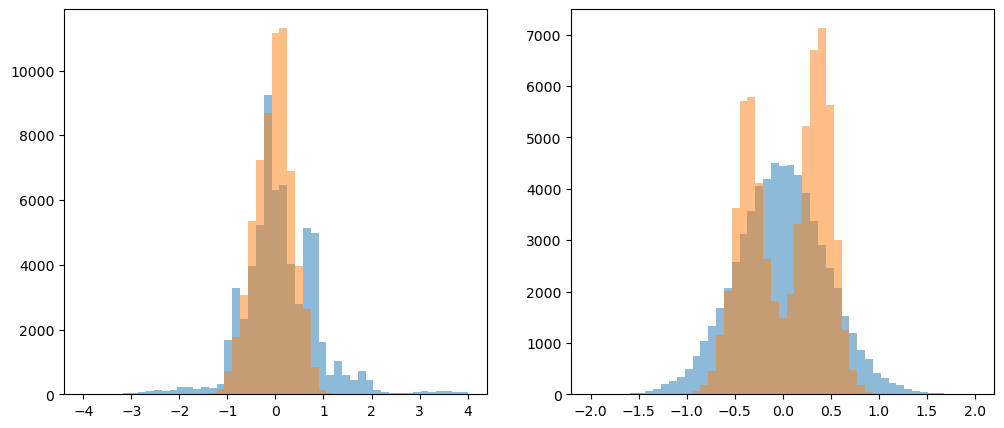

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

f, axs = plt.subplots(1,2,figsize=(12, 5))
axs[0].hist(h1g.reshape(-1), alpha=0.5, bins=np.linspace(-4,4,50))
axs[0].hist(h2g.reshape(-1), alpha=0.5, bins=np.linspace(-4,4,50))
axs[1].hist(h1m.reshape(-1), alpha=0.5, bins=np.linspace(-2,2,50))
axs[1].hist(h2m.reshape(-1), alpha=0.5, bins=np.linspace(-2,2,50))

In [23]:
from sklearn.manifold import TSNE

tsne = TSNE()
_g = tsne.fit_transform(np.vstack([h1g, h2g]))
tsne = TSNE()
_m = tsne.fit_transform(np.vstack([h1m, h2m]))

/home/jhyang/anaconda3/envs/poly/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jhyang/anaconda3/envs/poly/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/jhyang/anaconda3/envs/poly/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jhyang/anaconda3/envs/poly/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


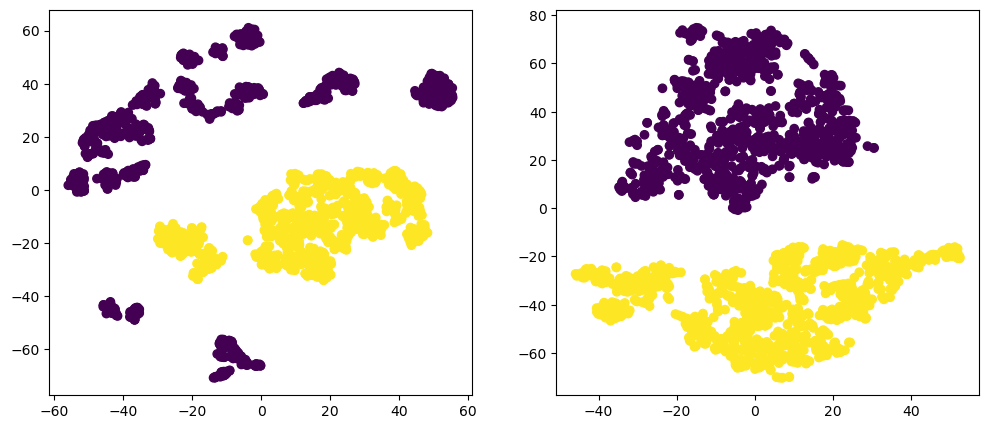

In [27]:
f, axs = plt.subplots(1,2,figsize=(12,5))
axs[0].scatter(*_g.T, c=np.hstack([[0]*1000,[1]*1000]))
axs[1].scatter(*_m.T, c=np.hstack([[0]*1000,[1]*1000]))

In [41]:
model = SSIBEncoder(**encoder_params)
model.load('/home/jhyang/WORKSPACES/MODELS/fpoly/r42/encoders/ssib/tf_cv5_01_info', 
           'best.model.torch')
model.cuda()
model(**x)
model.scalars

{'MI/Z1Z2': tensor(-102.3214, device='cuda:0'),
 'MI/V1Z1': tensor(4.6387e-06, device='cuda:0'),
 'MI/V2Z2': tensor(1.5793e-06, device='cuda:0'),
 'Loss/MINE': tensor(108.2803, device='cuda:0'),
 'Loss/CLUBNet1': tensor(95.8269, device='cuda:0'),
 'Loss/CLUBNet2': tensor(-26.0508, device='cuda:0')}

In [1]:
from utils.dataset import MoleculeDataset, collate_fn, to_tensor
from utils.data import train_test_split, CrossValidation
from utils.trainer import SSIBTrainer
from utils.runner import run_ssib
from utils.params import Parameters
from model.models import SSIBEncoder
import torch, gc, os
from torch.utils.data import DataLoader
from torch.optim import AdamW
import numpy as np
from argparse import ArgumentParser

def set_random_state(p):
    np.random.seed(p.random_state)
    torch.manual_seed(p.random_state)
    if p.device == 'cuda':
        torch.cuda.manual_seed(p.random_state)

p = Parameters(root='./pt_params/', fn='ssib_tf.json')

dataset = MoleculeDataset(norm=p.normalize_feature)
dataset.generate_qm9(path=p.data_path, col_target=p.target_column)

data = to_tensor(dataset.data, device=p.device)
train_data_, test_data = train_test_split(data, train_ratio=p.train_ratio, seed=123)

set_random_state(p)

if p.cross_valid:
    k_fold = CrossValidation(train_data_, p.num_fold)
    p.num_repeat = p.num_fold

p.graph_net_params.update({
    'node_dim':dataset.num_atom_feat,
    'edge_dim':dataset.num_bond_feat,
    'output_dim':64,
})

p.mol_net_params.update({
    'input_dim':dataset.num_mol_feat,
    'output_dim':64
})

encoder_params = {
    'graph_net_params': p.graph_net_params,
    'mol_net_params': p.mol_net_params,
}

p.decoder_params['output_dim'] = dataset.num_target

for n in range(p.num_repeat):
    gc.collect()
    torch.cuda.empty_cache()
    model_desc = f"{p.tag}_{n:02d}_info"
    path_model = os.path.join(p.output_path, f'r{p.random_state}/encoders/ssib/test_{model_desc}')
    if os.path.isdir(path_model): continue
    if p.cross_valid:
        train_data, valid_data = k_fold[n]
    else:
        train_data, valid_data = train_test_split(train_data_, train_ratio=1-p.valid_ratio)
    train_dl = DataLoader(train_data, batch_size=p.batch_size, shuffle=True, collate_fn=collate_fn)
    valid_dl = DataLoader(valid_data, batch_size=p.batch_size, collate_fn=collate_fn)
    test_dl  = DataLoader(test_data, batch_size=p.batch_size, collate_fn=collate_fn)

    model = SSIBEncoder(**encoder_params).to(p.device)
    opt = AdamW(model.parameters(), lr=p.learning_rate)
    trainer = SSIBTrainer(model=model, opt=opt)
    
    run_ssib(train_dl=train_dl, valid_dl=valid_dl, test_dl=test_dl, trainer=trainer, 
             path=path_model, epochs=p.epochs, early_stop=p.early_stop, 
             logging_interval=p.logging_interval, 
             step_size=p.scheduler_step_size, gamma=p.scheduler_gamma, verbose=True)

  Overwriting attribute : norm
  Overwriting attribute : data
  Overwriting attribute : atom_feat_name
  Overwriting attribute : bond_feat_name
  Overwriting attribute : mol_feat_name
  Overwriting attribute : tag
  Overwriting attribute : targets
  Overwriting attribute : cache_fn
           |      Train              |      Valid              |       Test
     Epoch |       Loss |         MI |       Loss |         MI |         MI
    1/ 5000 |      0.412 |      0.143 |     -0.028 |      0.552 |      0.550
    2/ 5000 |     -0.239 |      0.973 |     -0.285 |      0.897 |      0.916
    3/ 5000 |     -0.450 |      1.430 |     -0.291 |      1.163 |      1.169
    4/ 5000 |     -0.578 |      1.840 |     -0.656 |      2.121 |      2.157
    5/ 5000 |     -0.703 |      2.350 |     -0.755 |      2.543 |      2.566
    6/ 5000 |     -0.767 |      2.410 |     -0.320 |      1.513 | 
    7/ 5000 |     -0.554 |      2.071 |     -0.154 |      1.304 | 
    8/ 5000 |     -0.614 |      2.279 |     -0

KeyboardInterrupt: 

# Encoder loading test - IMax of MultiHeadModel

In [75]:
from utils.dataset import MoleculeDataset, fpoly_collate_fn, to_tensor
from utils.data import train_test_split, DataScaler, CrossValidation
from utils.trainer import Trainer
from utils.runner import run
from utils.params import Parameters
from model.models import MultiHeadModel
import torch, gc, os
from torch.utils.data import DataLoader
from torch.optim import AdamW
import numpy as np
from argparse import ArgumentParser

def set_random_state(p):
    np.random.seed(p.random_state)
    torch.manual_seed(p.random_state)
    if p.device == 'cuda':
        torch.cuda.manual_seed(p.random_state)

p = Parameters('concat_mult_add_cg.json', root='./params_info', default='defaults_s3_01.json')

dataset = MoleculeDataset(norm=p.normalize_feature)
dataset.generate_fpoly(path=p.data_path, col_target=p.target_column)

data = to_tensor(dataset.data, device=p.device)
train_data_, test_data = train_test_split(data, train_ratio=p.train_ratio, seed=123)

set_random_state(p)

scaler = DataScaler(device=p.device)

if p.cross_valid:
    k_fold = CrossValidation(train_data_, p.num_fold)
    p.num_repeat = p.num_fold

p.graph_net_params.update({
    'node_dim':dataset.num_atom_feat,
    'edge_dim':dataset.num_bond_feat,
})

p.mol_net_params.update({
    'input_dim':dataset.num_mol_feat,
})

p.decoder_params['output_dim'] = dataset.num_target

encoder_params = {
    'graph_net_params': p.graph_net_params,
    'mol_net_params': p.mol_net_params,
}



  Overwriting attribute : norm
  Overwriting attribute : data
  Overwriting attribute : atom_feat_name
  Overwriting attribute : bond_feat_name
  Overwriting attribute : mol_feat_name
  Overwriting attribute : targets
  Overwriting attribute : tag
  Overwriting attribute : cache_fn


## parameter 비교

In [18]:
from model.models import MultiHeadModel
import numpy as np

In [21]:
fn = '/home/jhyang/WORKSPACES/MODELS/fpoly/r42/finetune_3i/graph/imax_info_tf/02000.model.torch'
params = {
    "encoder_type": "graph",
    "encoder_params": {
        "graph_net_params": {
            "hidden_dim": 64,
            "output_dim": 64,
            "n_layer": 4,
            "graph": "tf",
            "node_dim": 26,
            "edge_dim": 5
        },
        "mol_net_params": {
            "hidden_dim": 128,
            "output_dim": 64,
            "n_layer": 2,
            "input_dim": 399
        }
    },
    "shared": False,
    "decoder_params": {
        "hidden_dim": 32,
        "n_layer": 2,
        "output_dim": 12,
        "input_dim": 64
    }
}

In [22]:
model = MultiHeadModel(**params)
sd_before = {k:v.cpu().numpy().copy() for k,v in model.state_dict().items()}
fn = '/home/jhyang/WORKSPACES/MODELS/fpoly/r42/scratch_3i/graph/imax_info_tf/00100.model.torch'
model.load(fn, rebuild_model=True)
sd_init = {k:v.cpu().numpy().copy() for k,v in model.state_dict().items()}
fn = '/home/jhyang/WORKSPACES/MODELS/fpoly/r42/scratch_3i/graph/imax_info_tf/02000.model.torch'
model.load(fn, rebuild_model=True)
sd_2k = {k:v.cpu().numpy().copy() for k,v in model.state_dict().items()}

In [23]:
output = {f'encoder_{x}':{'weight':[], 'bias':[]} for x in 'ABCDE'}
for k, v20 in sd_2k.items():
    if 'encoder' not in k: continue
    v01 = sd_init[k]
    vb = sd_before[k]
    encoder = k.split('.')[0]
    if 'weight' in k:
        wtyp = 'weight'
    elif 'bias' in k:
        wtyp = 'bias'
    else:
        continue
    output[encoder][wtyp].append(np.var(v20 - v01))

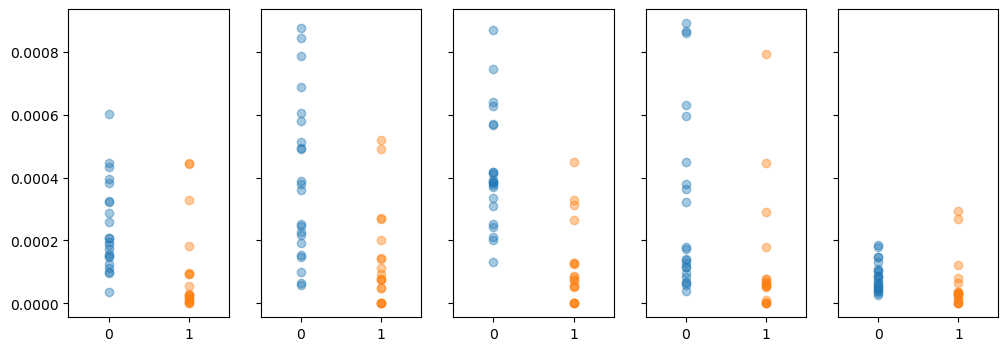

In [24]:
import matplotlib.pyplot as plt
f, axs = plt.subplots(1, 5, figsize=(12, 4), sharey=True)
for ax, v in zip(axs, output.values()):
    w = v['weight']
    b = v['bias']
    ax.scatter(np.zeros(len(w)), w, alpha=0.4)
    ax.scatter(np.ones(len(b)), b, alpha=0.4)
    ax.set_xlim([-0.5, 1.5])

In [25]:
for k,v in sd_2k.items():
    z = f'{k:60s}\t{str(v.shape):15s}'
    if k in sd_before.keys():
        vb = sd_before[k]
        z += f'\t{str(vb.shape):15s}'
    print(z)

encoder_A.graphnet.graph_embed.0.weight                     	(64, 26)       	(64, 26)       
encoder_A.graphnet.graph_embed.0.bias                       	(64,)          	(64,)          
encoder_A.graphnet.graph_network.module_0.lin_key.weight    	(64, 64)       	(64, 64)       
encoder_A.graphnet.graph_network.module_0.lin_key.bias      	(64,)          	(64,)          
encoder_A.graphnet.graph_network.module_0.lin_query.weight  	(64, 64)       	(64, 64)       
encoder_A.graphnet.graph_network.module_0.lin_query.bias    	(64,)          	(64,)          
encoder_A.graphnet.graph_network.module_0.lin_value.weight  	(64, 64)       	(64, 64)       
encoder_A.graphnet.graph_network.module_0.lin_value.bias    	(64,)          	(64,)          
encoder_A.graphnet.graph_network.module_0.lin_edge.weight   	(64, 5)        	(64, 5)        
encoder_A.graphnet.graph_network.module_0.lin_skip.weight   	(64, 64)       	(64, 64)       
encoder_A.graphnet.graph_network.module_0.lin_skip.bias     	(64,)    

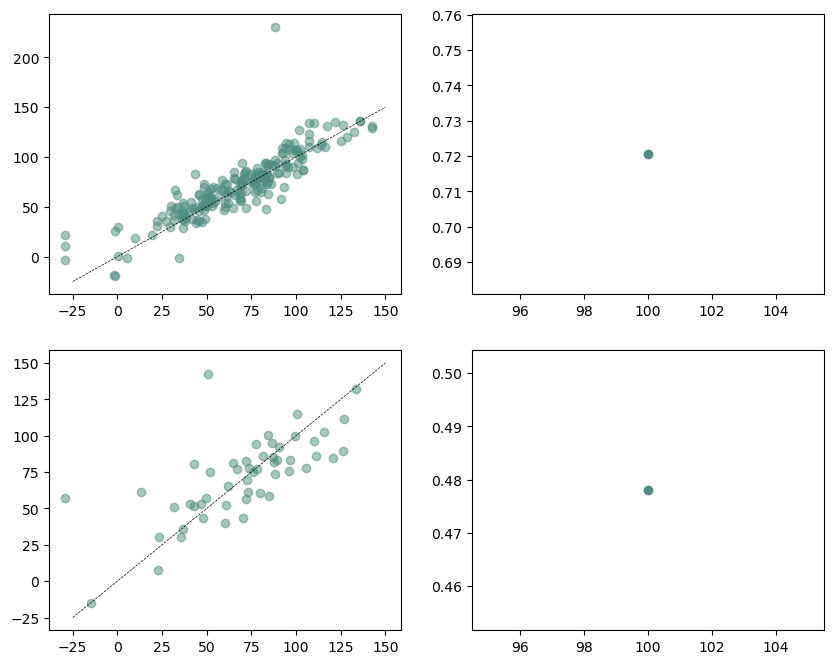

In [154]:
import pickle, os
from sklearn.metrics import r2_score

root = '/home/jhyang/WORKSPACES/MODELS/fpoly/r42/finetune_32/concat/mult_add_tf/'
f, ax = plt.subplots(2,2, figsize=(10, 8))
for i in range(20, 4000, 20):
    for j, dset in enumerate(['valid','test']):
        fn = os.path.join(root, f'{i:05d}.{dset}.pkl')
        if not os.path.isfile(fn): continue
        _info, _tgt, _pred = pickle.load(open(fn,'rb'))
        diff = (_tgt - _pred).reshape(-1)
        idxs = np.where(np.abs(diff) > 60)[0]
#        print(_info[idxs], diff[idxs].reshape(-1))
        color = [0.3, i/400+0.3, 1-i/200]
        ax[j, 0].scatter(_tgt, _pred, color=color, alpha=0.5)
        ax[j, 0].plot([-25,150],[-25,150],ls='--',color=[0,0,0],lw=0.5)
        ax[j, 1].scatter(i, r2_score(_tgt, _pred), color=color)
        if i == 200:
            idxs = idxs[np.argsort(diff[idxs])[::1]]
            for idx in idxs:
                ax[j,0].text(_tgt[idx], _pred[idx], s=f'{_info[idx]} : {diff[idx].item():8.2f}')
                
            

# speed test

In [1]:
import sys
sys.path.append('..')
from utils.dataset import MoleculeDataset, fpoly_collate_fn, to_tensor
from utils.data import train_test_split, DataScaler
from utils.trainer import SSIBTrainer, Trainer
from utils.runner import run_ssib, run
from utils.params import Parameters
from model.models import MultiHeadModel, MultiHeadIMaxModel
import torch, gc, os
from torch.utils.data import DataLoader
from torch.optim import AdamW
import numpy as np
from argparse import ArgumentParser
import random

def set_random_state(p):
    random.seed(p.random_state)
    np.random.seed(p.random_state)
    torch.manual_seed(p.random_state)
    torch.cuda.manual_seed(p.random_state)
    torch.cuda.manual_seed_all(p.random_state)

os.chdir('..')

p = Parameters(fn='concat/mult_max_tf.json', 
               default='defaults_r100_n2i-01.json', 
               root='./params_sc')

dataset = MoleculeDataset(norm=p.normalize_feature)
dataset.generate_fpoly(path=p.data_path, col_target=p.target_column)

p.graph_net_params.update({
    'node_dim':dataset.num_atom_feat,
    'edge_dim':dataset.num_bond_feat,
})

p.mol_net_params.update({
    'input_dim':dataset.num_mol_feat,
})

encoder_params = {
    'graph_net_params': p.graph_net_params,
    'mol_net_params': p.mol_net_params,
}

p.decoder_params['output_dim'] = dataset.num_target

  Overwriting attribute : norm
  Overwriting attribute : data
  Overwriting attribute : atom_feat_name
  Overwriting attribute : bond_feat_name
  Overwriting attribute : mol_feat_name
  Overwriting attribute : targets
  Overwriting attribute : tag
  Overwriting attribute : cache_fn


In [8]:
p.device = 'cuda'
data = to_tensor(dataset.data, device=p.device)
train_data_, test_data = train_test_split(data, train_ratio=p.train_ratio, seed=123)

scaler = DataScaler(device=p.device)

for i in range(2):
    gc.collect()
    torch.cuda.empty_cache()

    set_random_state(p)
    scaler.train(train_data_)
        
    scaled_train_data = scaler.scale_data(train_data_)
    scaled_test_data = scaler.scale_data(test_data)
    
    train_dl = DataLoader(scaled_train_data, batch_size=p.batch_size, shuffle=True, 
                          collate_fn=fpoly_collate_fn)
    test_dl  = DataLoader(scaled_test_data, batch_size=512, 
                          collate_fn=fpoly_collate_fn)

    model = MultiHeadModel(encoder_type=p.encoder_type, encoder_params=encoder_params, 
                           decoder_params=p.decoder_params, pooling=p.encoder_readout, 
                           shared=p.encoder_share)
    sd = model.state_dict()
    model.to(p.device)

    opt = AdamW(model.parameters(), lr=p.learning_rate)
    trainer = Trainer(model=model, opt=opt, scaler=scaler)

    run(train_dl=train_dl, test_dl=test_dl, trainer=trainer, 
        path=f'./test/model/reproduce/{i:02d}', epochs=20, early_stop=p.early_stop, 
        relax_after=0, logging_interval=p.logging_interval, 
        step_size=p.scheduler_step_size, gamma=p.scheduler_gamma, verbose=False)
    sd = model.state_dict()
    

..../test/model/reproduce/00:   0%|          | 0/20 [00:00<?, ?it/s]

RuntimeError: cannot pin 'torch.cuda.FloatTensor' only dense CPU tensors can be pinned

In [7]:
p.device = 'cpu'
data = to_tensor(dataset.data, device=p.device)
train_data_, test_data = train_test_split(data, train_ratio=p.train_ratio, seed=123)

scaler = DataScaler(device=p.device)

for i in range(2):
    gc.collect()
    torch.cuda.empty_cache()

    set_random_state(p)
    scaler.train(train_data_)
        
    scaled_train_data = scaler.scale_data(train_data_)
    scaled_test_data = scaler.scale_data(test_data)
    
    train_dl = DataLoader(scaled_train_data, batch_size=64, shuffle=True, collate_fn=fpoly_collate_fn)
    test_dl  = DataLoader(scaled_test_data, batch_size=512, collate_fn=fpoly_collate_fn)

    model = MultiHeadModel(encoder_type='mol', encoder_params=encoder_params, 
                           decoder_params=p.decoder_params, pooling=p.encoder_readout, 
                           shared=p.encoder_share)
    sd = model.state_dict()
    model.to(p.device)

    opt = AdamW(model.parameters(), lr=p.learning_rate)
    trainer = Trainer(model=model, opt=opt, scaler=scaler)

    run(train_dl=train_dl, test_dl=test_dl, trainer=trainer, 
        path=f'./test/model/reproduce/{i:02d}', epochs=20, early_stop=p.early_stop, 
        relax_after=0, logging_interval=p.logging_interval, 
        step_size=p.scheduler_step_size, gamma=p.scheduler_gamma, verbose=False)
    sd = model.state_dict()
    

..../test/model/reproduce/01: 100%|██████████| 20/20 [00:01<00:00, 17.48it/s]


In [1]:
import sys
sys.path.append('..')
from utils.dataset import MoleculeDataset
import numpy as np
from utils.data import stratified_train_test_split, CrossValidation
import matplotlib.pyplot as plt

md = MoleculeDataset(norm=True)
md.generate_fpolyv2('../dataset/fpolymers_221123.csv')

  Overwriting attribute : norm
  Overwriting attribute : data
  Overwriting attribute : atom_feat_name
  Overwriting attribute : bond_feat_name
  Overwriting attribute : mol_feat_name
  Overwriting attribute : targets
  Overwriting attribute : tag
  Overwriting attribute : cache_fn


In [6]:
stratum = np.array([len(d['F'])+len(d['C']) for d in md.data])
tidx, vidx = stratified_train_test_split(md.data, stratum, train_stratum=[2,3,4], remove_stratum=[1], return_index=True)
train_data = md.data[tidx]
test_data = md.data[vidx]

In [26]:
k = 20
cv = CrossValidation(n_fold=k, data=tidx, stratum=stratum[tidx], return_index=False)

More than one fold contains full data of class: [2]


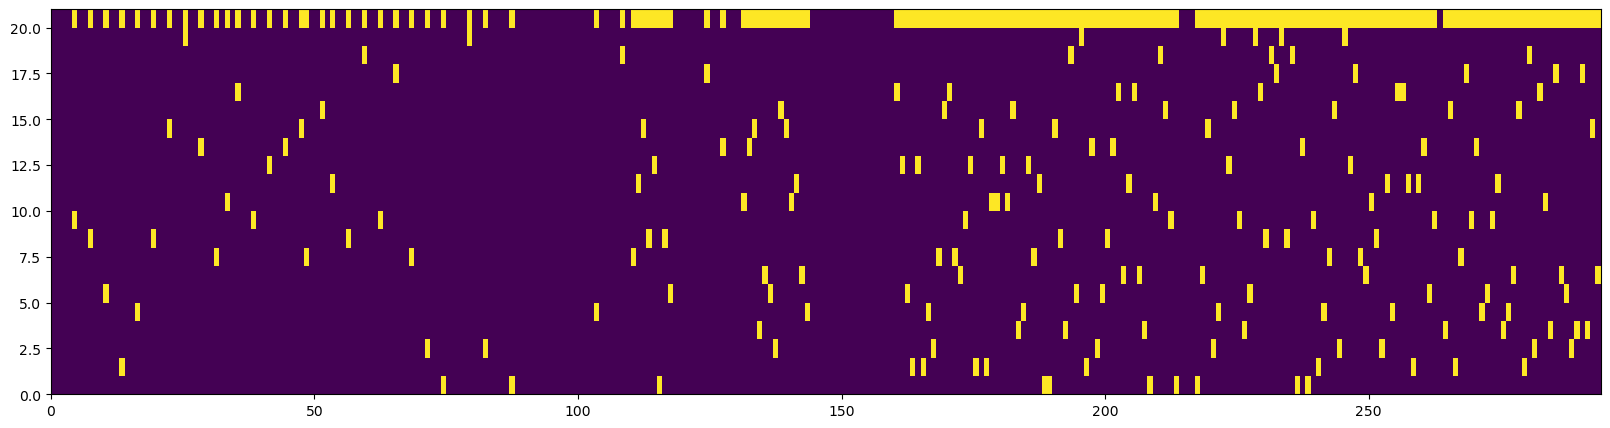

In [28]:
import matplotlib.pyplot as plt
mat = np.zeros((k+1, len(stratum)))
for i in range(k):
    cvtidx, cvvidx = cv[i]
    mat[i, cvvidx] += 1
    mat[-1] += mat[i]
f, ax = plt.subplots(1,1,figsize=(20, 5))
ax.pcolormesh(mat)

In [289]:
def cv(index, k, verbose=True):
    n = len(index)
    c = int(n/k) + bool(n%k)
    l = n - k * (c - bool(n%k))
    i1 = 0
    i2 = c
    tidx = []
    vidx = []
    if verbose: 
        print(n, l, c, k)
    for i in range(k):
    #    print('{:7d} {:7d} {:7d} {:7d} {:7d}'.format(i1, i2, len(idxs[:i1]), len(idxs[i2:]), len(idxs[i1:i2])))
        if verbose:
            print(f'fold {i+1:2d} : {i1:5d} ... {i2:5d} / ...',index[np.max([0,i1-2]):i1], '|',
                  index[i1:i1+np.min([2,c])], '...',index[np.max([0,i2-np.min([2,c])]):i2], f'({i2-i1})', '|', 
                  index[i2:i2+2],'...')
        tidx.append(np.hstack([index[:i1], index[i2:]]))
        vidx.append(index[i1:i2])
        i1 += c
        if i == (l - 1): c -= 1
        i2 += c
    return tidx, vidx

cv(np.arange(4), 8)

4 4 1 8
fold  1 :     0 ...     1 / ... [] | [0] ... [0] (1) | [1 2] ...
fold  2 :     1 ...     2 / ... [0] | [1] ... [1] (1) | [2 3] ...
fold  3 :     2 ...     3 / ... [0 1] | [2] ... [2] (1) | [3] ...
fold  4 :     3 ...     4 / ... [1 2] | [3] ... [3] (1) | [] ...
fold  5 :     4 ...     4 / ... [2 3] | [] ... [] (0) | [] ...
fold  6 :     4 ...     4 / ... [2 3] | [] ... [] (0) | [] ...
fold  7 :     4 ...     4 / ... [2 3] | [] ... [] (0) | [] ...
fold  8 :     4 ...     4 / ... [2 3] | [] ... [] (0) | [] ...


([array([1, 2, 3]),
  array([0, 2, 3]),
  array([0, 1, 3]),
  array([0, 1, 2]),
  array([0, 1, 2, 3]),
  array([0, 1, 2, 3]),
  array([0, 1, 2, 3]),
  array([0, 1, 2, 3])],
 [array([0]),
  array([1]),
  array([2]),
  array([3]),
  array([], dtype=int64),
  array([], dtype=int64),
  array([], dtype=int64),
  array([], dtype=int64)])

In [312]:
num_monomers = np.array([len(d['F']) + len(d['C']) for d in md.data])
index = np.arange(len(num_monomers))
cs = np.sort(np.unique(num_monomers))
ks = np.array([np.sum(c == num_monomers) for c in cs])
stratum = num_monomers
n_fold = 10
train_index = [[] for _ in range(n_fold)]
valid_index = [[] for _ in range(n_fold)]
if n_fold > np.min(ks):
    print(f"Warning: Number of folds is larger than number of data (got: {n_fold} / min: {np.min(ks)})\nMore than one fold contains full data of class: {cs[ks < n_fold]}")
for c in cs:
    idx = index[num_monomers == c]
#    np.random.shuffle(idx)
    tidxs, vidxs = cv(idx, n_fold, verbose=False)
    for i, (tidx, vidx) in enumerate(zip(tidxs, vidxs)):
        train_index[i].append(tidx)
        valid_index[i].append(vidx)
ftidxs = [np.hstack(i) for i in train_index]
fvidxs = [np.hstack(i) for i in valid_index]

More than one fold contains full data of class: [1]


In [314]:
train_index[-1], valid_index[-1]

([array([ 93,  94,  95,  96,  97,  98,  99, 125, 126]),
  array([110, 111, 112, 113, 132, 136, 165, 166, 167, 170, 173, 174, 209,
         213, 265, 289]),
  array([114, 131, 133, 134, 135, 137, 168, 169, 171, 172, 175, 176, 177,
         178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
         191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203,
         204, 205, 206, 207, 208, 210, 211, 212, 219, 220, 221, 222, 223,
         224, 225, 226, 227, 229, 230, 231, 232, 233, 234, 235, 236, 237,
         238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250,
         251, 252, 253, 254, 255, 256, 257, 258, 259, 260]),
  array([  4,   7,  10,  13,  16,  19,  22,  25,  28,  31,  33,  35,  38,
          41,  44,  47,  48,  51,  53,  56,  59,  62,  65,  68,  71,  74,
          79,  82,  87, 103, 108, 115, 116, 117, 124, 127, 138, 139, 140,
         141, 142, 143, 160, 161, 162, 163, 164, 217, 218, 228, 264, 266,
         267, 273, 274, 275, 276, 277, 278,

In [181]:
num_monomers = np.array([len(d['F']) + len(d['C']) for d in md.data])
classes = [np.sum(i == num_monomers) for i in np.sort(np.unique(num_monomers))]
k = 10
tidxs = [[] for _ in range(k)]
vidxs = [[] for _ in range(k)]
index = np.arange(len(num_monomers))
for i in np.sort(np.unique(num_monomers)):
    idx = index[i == num_monomers]
    c = np.max([1, int(len(idx)/k)+1]) 
    l = len(idx) - (c - 1) * k
    np.random.shuffle(idx)
    i1 = 0
    i2 = c
    for j in range(k):
        tidx = np.hstack([idx[:i1], idx[i2:]])
        vidx = idx[i1:i2]
        if i == 1: print(i1, i2, tidx, vidx)
        tidxs[j].append(tidx)
        vidxs[j].append(vidx)
        i1 += c
        if j == (l-1): c -= 1
        i2 += c

train_idxs = [np.hstack(idx) for idx in tidxs]
valid_idxs = [np.hstack(idx) for idx in vidxs]

0 1 [ 95  97  93  96  99  98  94 126] [125]
1 2 [125  97  93  96  99  98  94 126] [95]
2 3 [125  95  93  96  99  98  94 126] [97]
3 4 [125  95  97  96  99  98  94 126] [93]
4 5 [125  95  97  93  99  98  94 126] [96]
5 6 [125  95  97  93  96  98  94 126] [99]
6 7 [125  95  97  93  96  99  94 126] [98]
7 8 [125  95  97  93  96  99  98 126] [94]
8 9 [125  95  97  93  96  99  98  94] [126]
9 9 [125  95  97  93  96  99  98  94 126] []


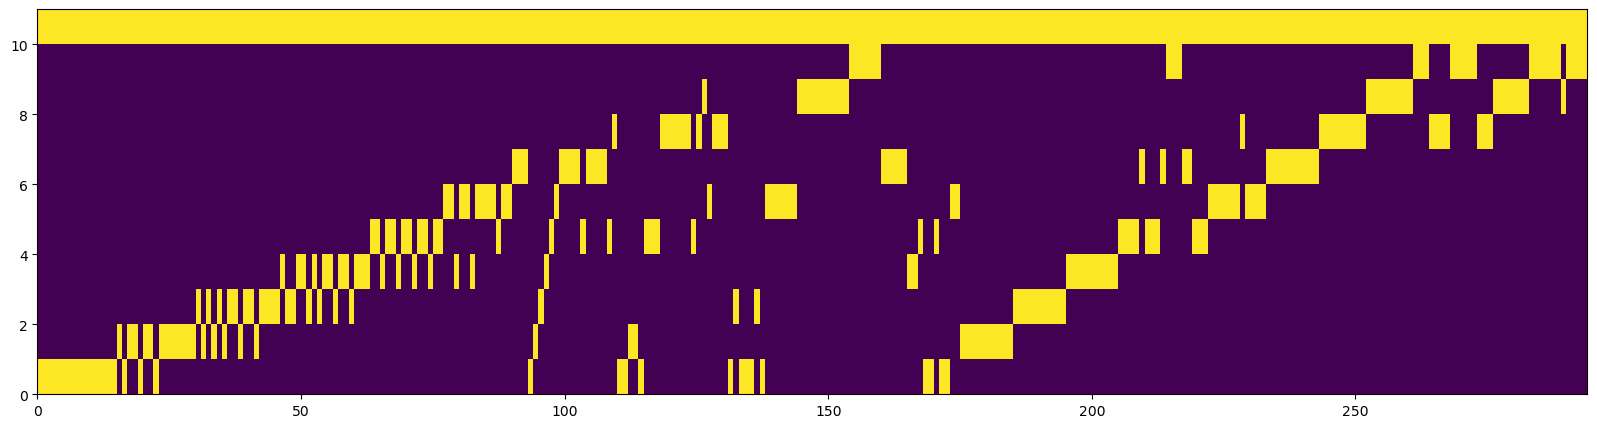

In [317]:
k = n_fold
mat = np.zeros((k+1, len(num_monomers)))
for i in range(k):
    mat[i, fvidxs[i]] += 1
#    mat[i, valid_idxs[i]] += 1
    mat[k] += mat[i]
f, ax = plt.subplots(1,1,figsize=(20, 5))
ax.pcolormesh(mat)